# <center>${\textbf{Machine Learning}}$</center><br><center>${\textbf{ Supervised Learning :  Classification}}$</center><br><center>${\textbf{Heart Disease}}$</center>


${\textbf{Importing Libraries}}$

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [7]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [8]:
from sklearn import tree

${\textbf{Loading Heart Disease Dataset}}$

In [9]:
Heart =  pd.read_csv('heart.csv')

<center>${\textbf{Data OverView}}$<center> 


* Data Set Characteristics: Multivariate
* Number of Instances: 303
* Area: N/A
* Attribute Characteristics: Categorical, Integer, Real
* Number of Attributes: 14
* Date Donated: 1988-07-01
* Associated Tasks: Classification
* Missing Values: Yes
* Number of Web Hits: 1981789

${\textbf{Sources: }}$
https://archive.ics.uci.edu/ml/datasets/heart+Disease
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

${\textbf{Data Set Information: }}$
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers tothis date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).<br>
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.<br>

${\textbf{Attribute Information: }}$
1. age: age in years
2. sex:  1 = male; 0 = female
3. cp: chest pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach:  maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment

* Value 1: upsloping
* Value 2: flat
* Value 3: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target: diagnosis of heart disease (angiographic disease status)

* Value 0: < 50% diameter narrowing
* Value 1: > 50% diameter narrowing

${\textbf{Relevant Papers: }}$

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.<br>
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."<br>
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

${\textbf{Preliminary Insights}}$

In [10]:
print(Heart.shape)
Heart.info()

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
Heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [12]:
Heart.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

<center>${\textbf{Exploratory Data Analysis: EDA}}$<center>

In [13]:
pp.ProfileReport(Heart)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
Heart.describe().T.round(2).style.background_gradient()

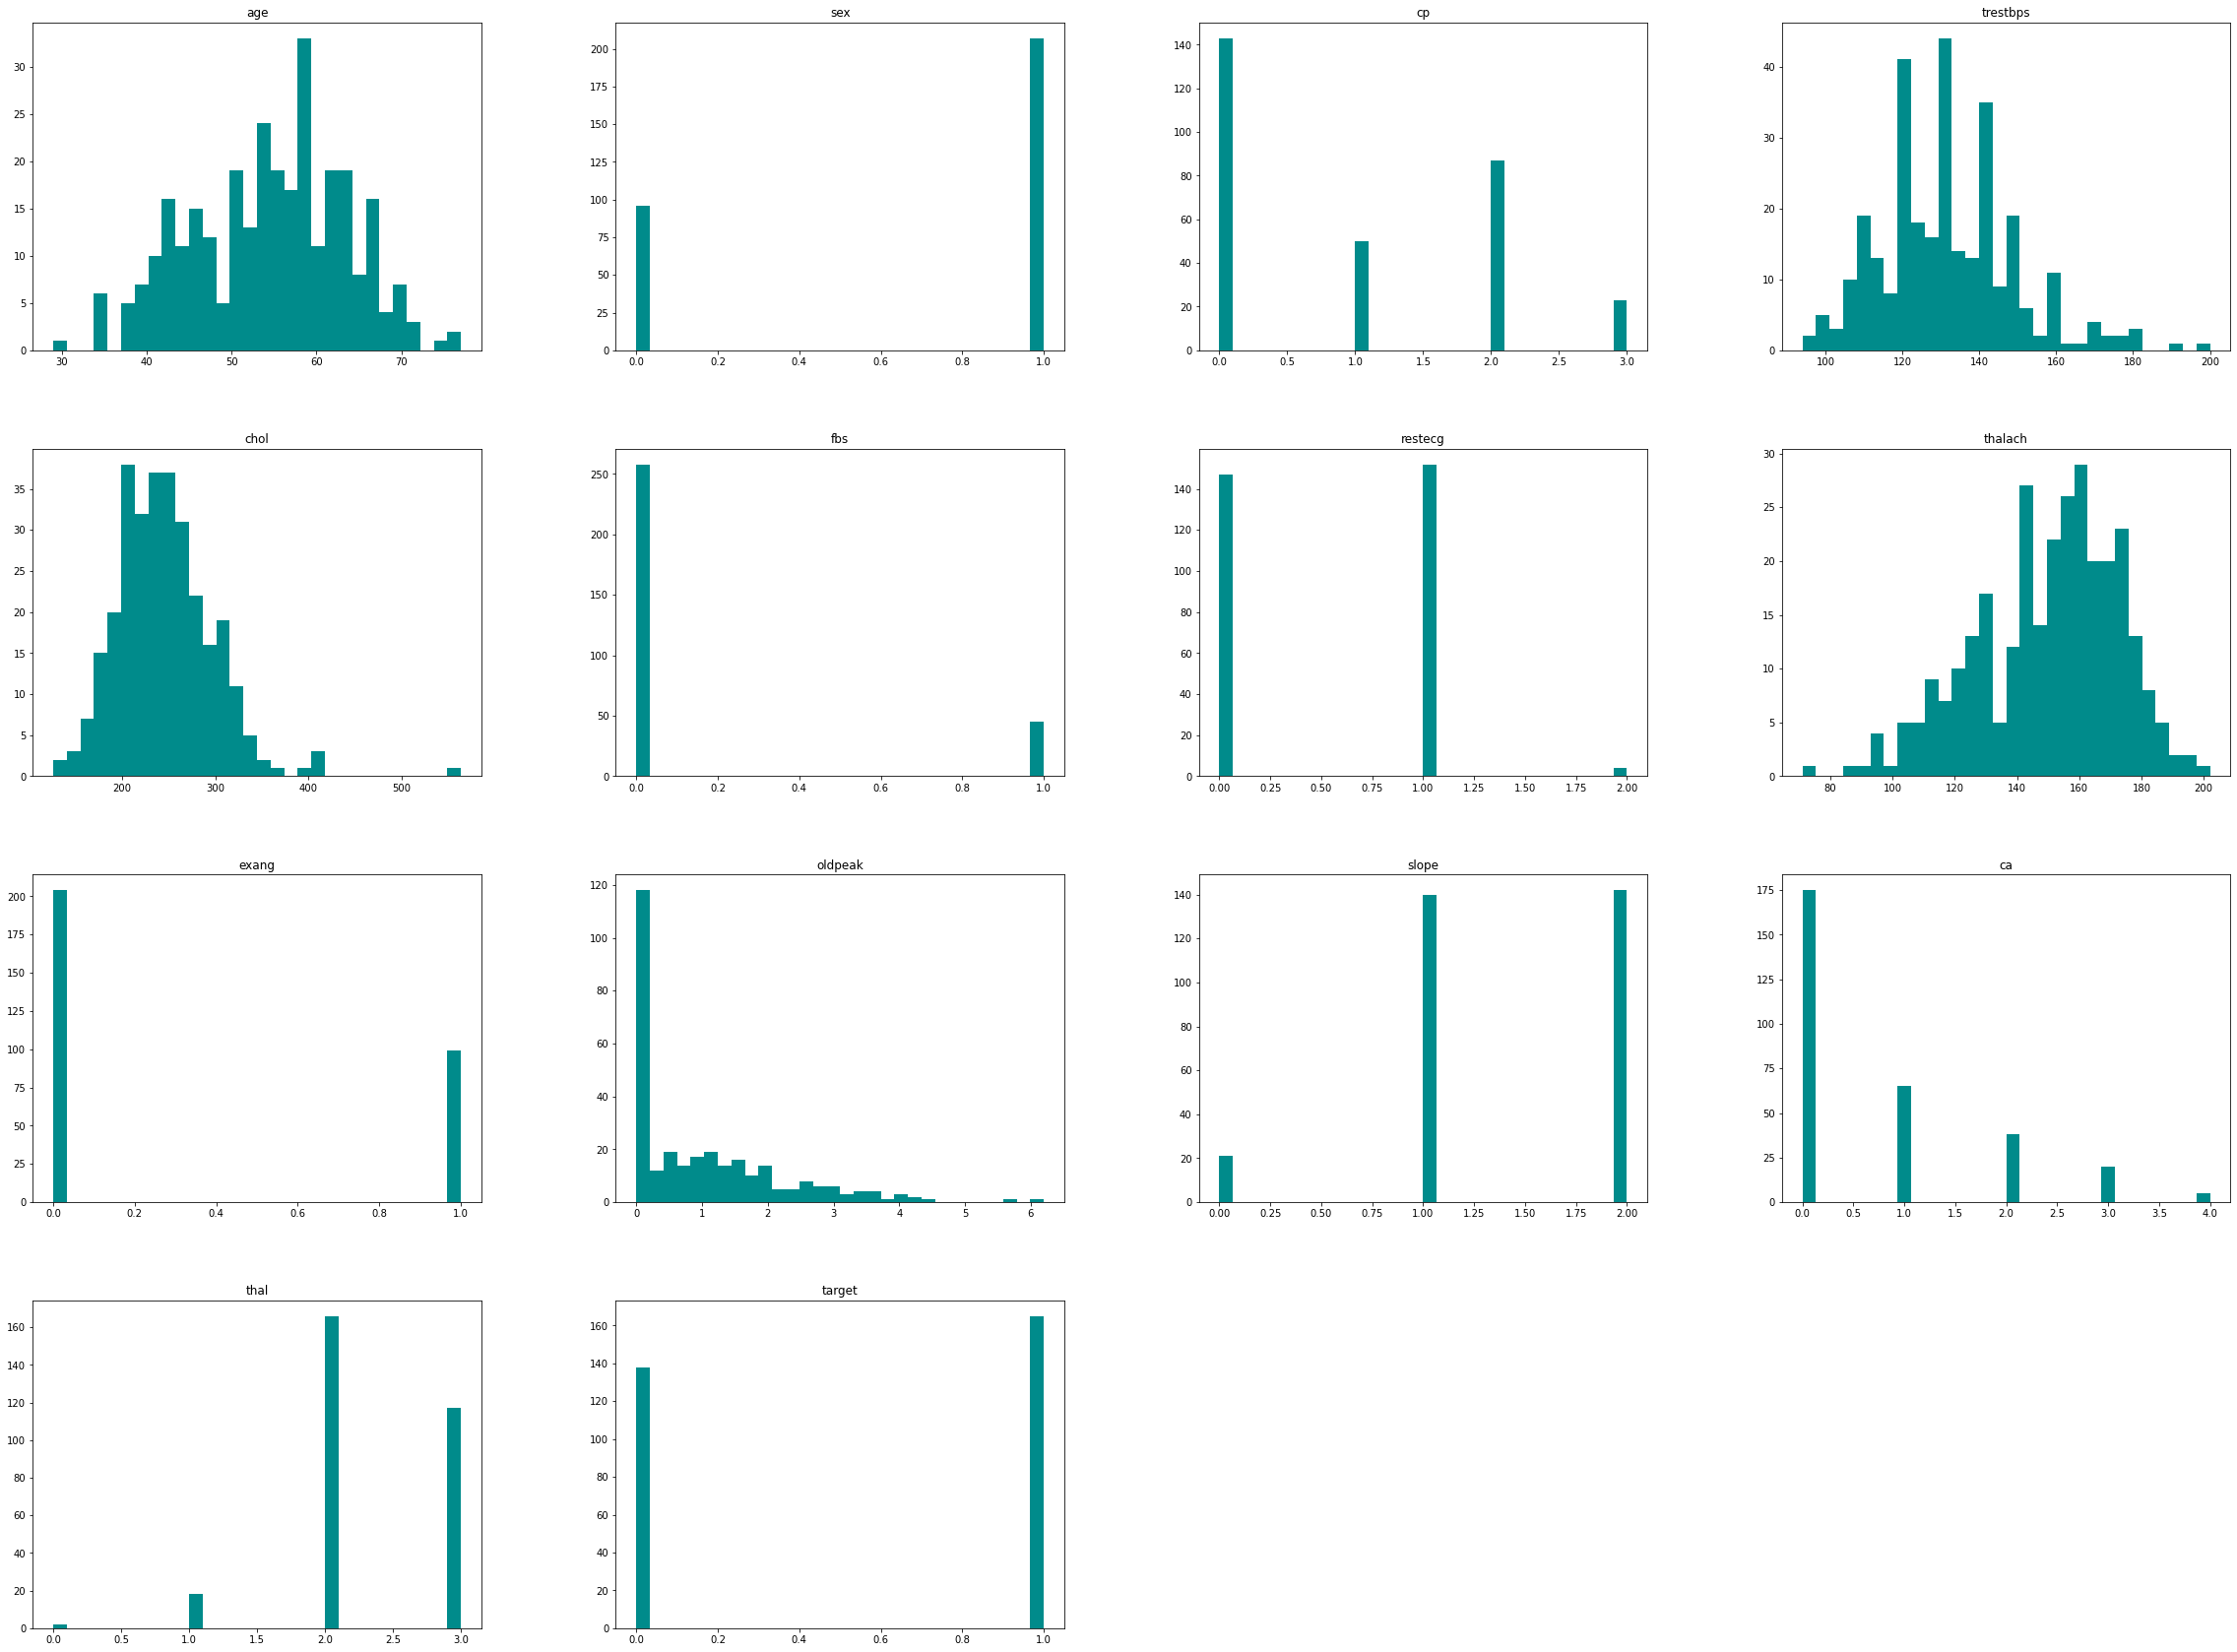

In [15]:
Heart.hist(bins = 30 , layout = (4,4), figsize = (40,30)  ,column = Heart.columns[0:], color= "DarkCyan", grid = False)
plt.show()

<AxesSubplot:>

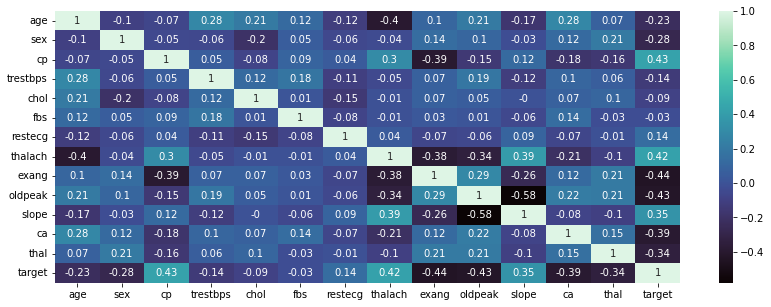

In [16]:
plt.figure(figsize = (14,5))
sns.heatmap(round(Heart.corr(),2),annot=True,cmap = 'mako')

Let's find how many people have heart disease and how many people doesn't have heart disease?

In [17]:
Heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

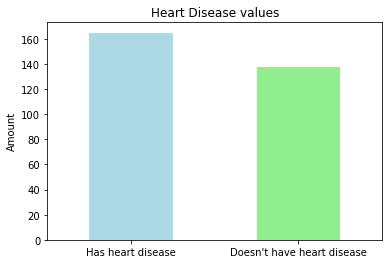

In [18]:
#plotting bar chart.
fig = Heart.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Amount");

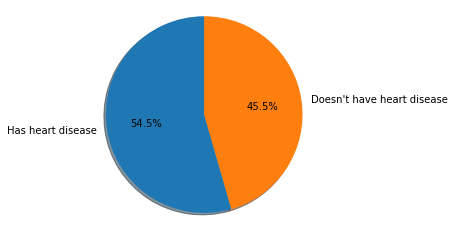

In [19]:
#visualizing in Pie chart
labels = "Has heart disease", "Doesn't have heart disease"
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(Heart.target.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Now let's check how many Male and Female are in the dataset

In [20]:
Heart.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

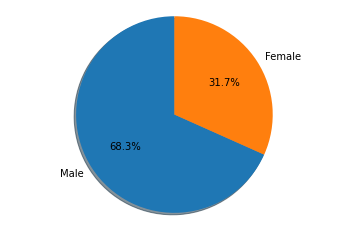

In [21]:
#visualizing in Pie chart
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(Heart.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Let's find People of which sex has most heart disease?

In [22]:
pd.crosstab(Heart.target, Heart.sex)

sex      0    1
target         
0       24  114
1       72   93

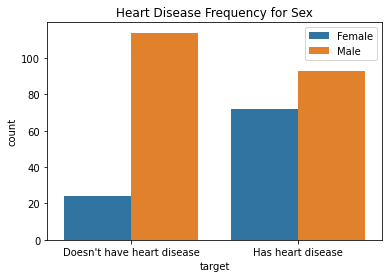

In [23]:
fig = sns.countplot(x = 'target', data = Heart, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

Let's find people of which sex has which type of chest pain most?

In [24]:
#counting values for different chest pain
Heart.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

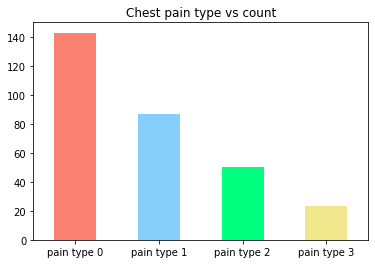

In [25]:
#plotting a bar chart
fig = Heart.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.title('Chest pain type vs count');

In [26]:
pd.crosstab(Heart.sex, Heart.cp)

cp     0   1   2   3
sex                 
0     39  18  35   4
1    104  32  52  19

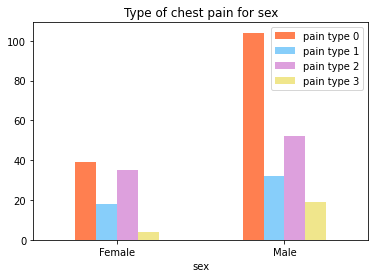

In [27]:
fig = pd.crosstab(Heart.sex, Heart.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

Now let's find people with which chest pain are most pron to have heart disease?

In [28]:
pd.crosstab(Heart.cp, Heart.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

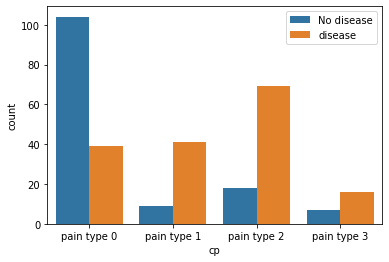

In [29]:
fig = sns.countplot(x = 'cp', data = Heart, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

Now let's take look at our age column.

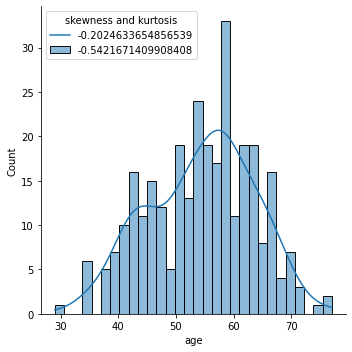

In [30]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = Heart, bins = 30, kde = True)
skewness=str(Heart["age"].skew())
kurtosis=str(Heart["age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

Let's plot another distribution plot for Maximum heart rate

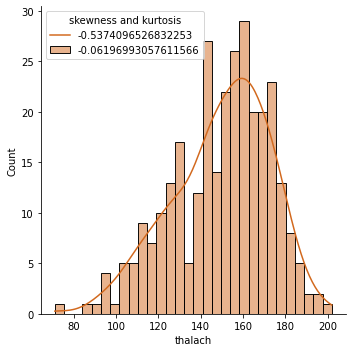

In [31]:
sns.displot(x = 'thalach', data = Heart, bins = 30, kde = True, color = 'chocolate')
skewness=str(Heart["thalach"].skew())
kurtosis=str(Heart["thalach"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

Now let's observe Age vs Maximum heart rate when people have heart disease.

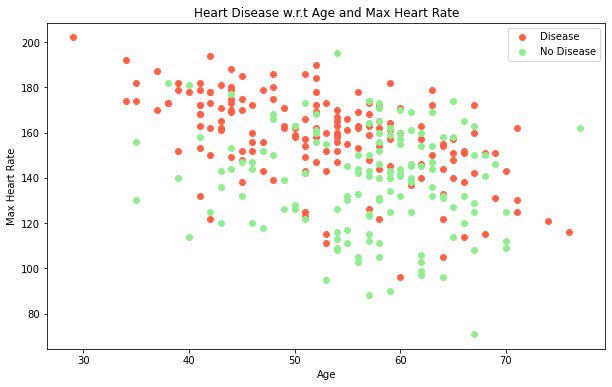

In [32]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(Heart.age[Heart.target==1], 
            Heart.thalach[Heart.target==1], 
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(Heart.age[Heart.target==0], 
            Heart.thalach[Heart.target==0], 
            c="lightgreen")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Let's make a density curve for visualizing the distribution of age and thalach(Maximum Heart Rate) observations in our dataset.

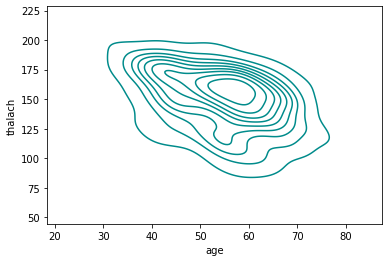

In [33]:
sns.kdeplot(x = 'age', y = 'thalach', data = Heart, color = 'darkcyan');

Let's see a distribution plot for number of people with heart disease vs max heart rate

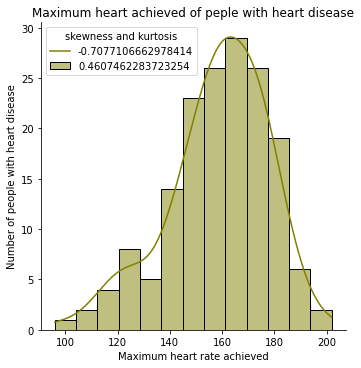

In [34]:
sns.displot(x = Heart.thalach[Heart.target==1], data = Heart, kde = True, color= 'olive')
skewness=str(Heart.thalach[Heart.target==1].skew())
kurtosis=str(Heart.thalach[Heart.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of peple with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

Distribution plot for number of people without heart disease vs max heart rate

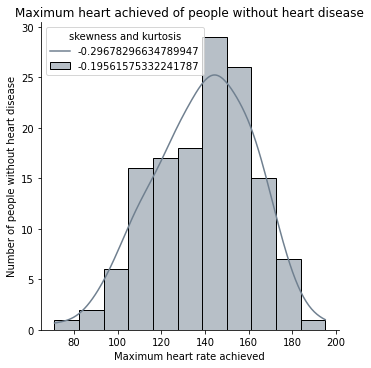

In [35]:
sns.displot(x = Heart.thalach[Heart.target==0], data = Heart, kde = True, color= 'slategray')
skewness=str(Heart.thalach[Heart.target==0].skew())
kurtosis=str(Heart.thalach[Heart.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

Now let's observe Age vs Serum Cholestoral when people have heart disease.

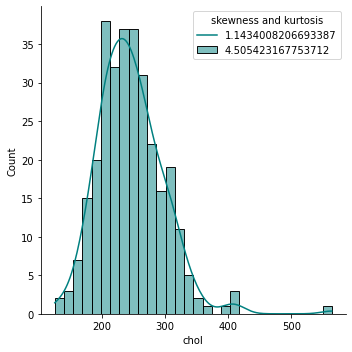

In [36]:
sns.displot(x = 'chol', data = Heart, bins = 30, kde = True, color = 'teal')
skewness=str(Heart['chol'].skew())
kurtosis=str(Heart['chol'].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));

Now let's plot another scatter plot for Age vs serum cholestoral

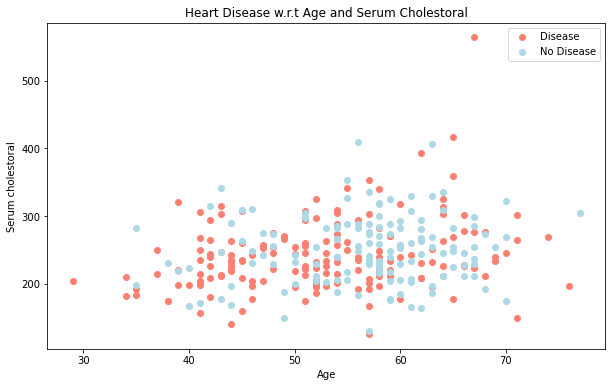

In [37]:
# Creating another figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(Heart.age[Heart.target==1], 
            Heart.chol[Heart.target==1], 
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(Heart.age[Heart.target==0], 
            Heart.chol[Heart.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

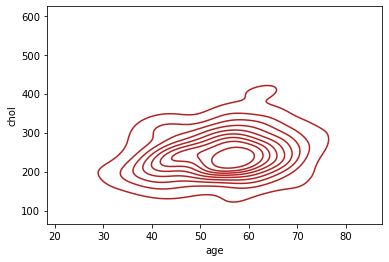

In [38]:
sns.kdeplot(x = 'age', y = 'chol', data = Heart, color = 'firebrick');

Distribution plot for number of people with heart disease vs Serum Cholestoral

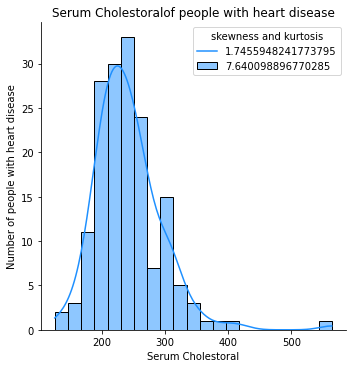

In [39]:
sns.displot(x = Heart.chol[Heart.target==1], data = Heart, kde = True, color= 'dodgerblue')
skewness=str(Heart.chol[Heart.target==1].skew())
kurtosis=str(Heart.chol[Heart.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholestoralof people with heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people with heart disease");

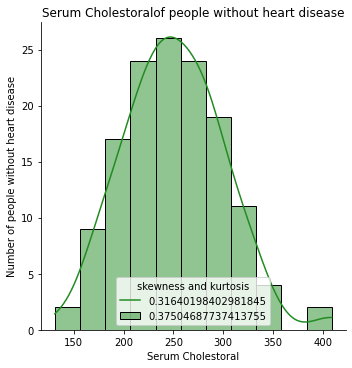

In [40]:
sns.displot(x = Heart.chol[Heart.target==0], data = Heart, kde = True, color= 'forestgreen')
skewness=str(Heart.chol[Heart.target==0].skew())
kurtosis=str(Heart.chol[Heart.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholestoralof people without heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people without heart disease");

Now let's find People of which sex has more exercise induced angina?

In [41]:
pd.crosstab(Heart.exang, Heart.sex)

sex     0    1
exang         
0      74  130
1      22   77

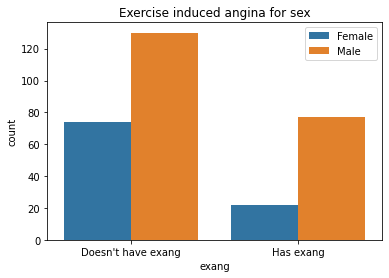

In [42]:
fig = sns.countplot(x = 'exang', data = Heart, hue = 'sex')
plt.title('Exercise induced angina for sex')
fig.set_xticklabels(labels=["Doesn't have exang", 'Has exang'], rotation=0)
plt.legend(['Female', 'Male']);

Which sex of people has more fasting blood sugar > 120 mg/dl?

In [43]:
Heart.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

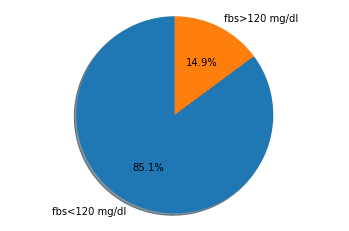

In [44]:
#visualizing in Pie chart
labels = 'fbs<120 mg/dl', 'fbs>120 mg/dl'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(Heart.fbs.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [45]:
pd.crosstab(Heart.sex, Heart.fbs)

fbs    0   1
sex         
0     84  12
1    174  33

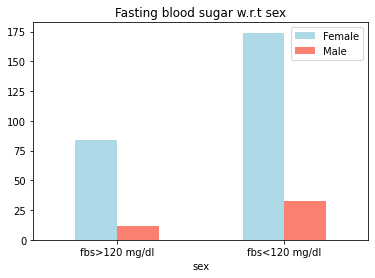

In [46]:
fig = pd.crosstab(Heart.sex, Heart.fbs).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t sex")
fig.set_xticklabels(labels=['fbs>120 mg/dl', 'fbs<120 mg/dl'], rotation=0)
plt.legend(['Female', 'Male']);

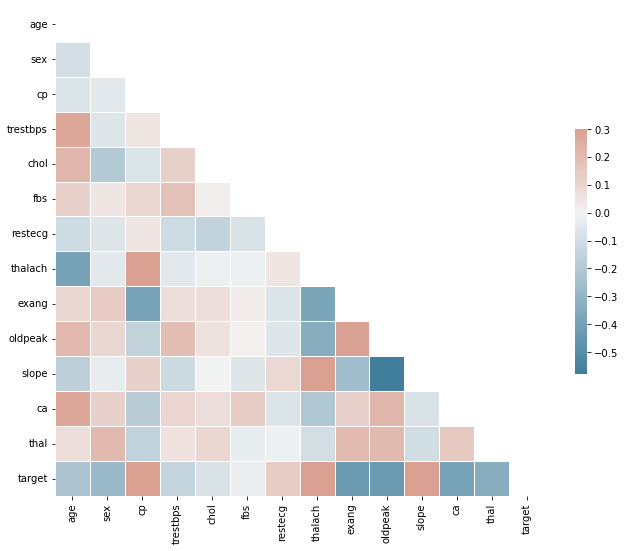

In [47]:
corr = Heart.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

${\textbf{Skewness}}$
Checking for skewness in the data, Skewness is used to check the normality of the data by ranging from -1 to 1.

* -1 --> Left skewed
* 0 --> Normal distribution
* 1 --> Right skewed

In [48]:
Heart.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

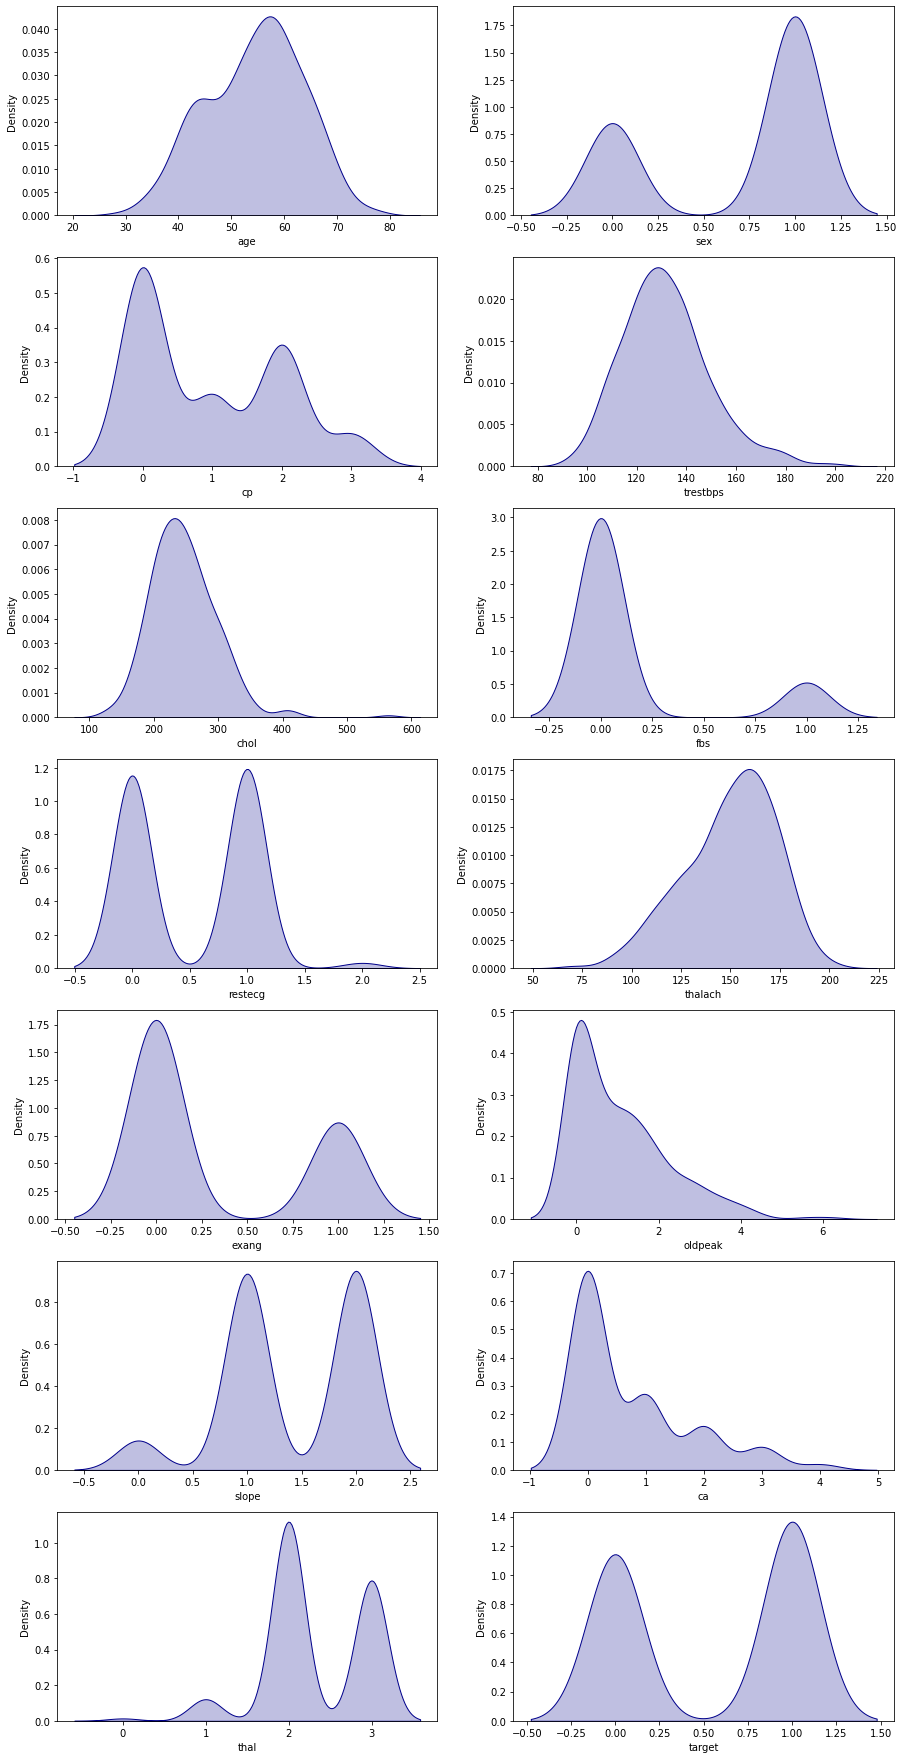

In [49]:
# kde plot for checking the normalization 
plt.figure(figsize=(15,50)) 
for i,j in zip(Heart,range(1,len(Heart)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(Heart[i],shade=True,color='darkblue')
plt.show()

In [50]:
#checking for null values
Heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<center>${\textbf{Data Modeling}}$<center>

In [51]:
x = Heart.drop('target',1)
y = Heart.target

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [53]:
len(xtrain), len(xtest), len(ytrain), len(ytest)

(212, 91, 212, 91)

In [54]:
clf = DecisionTreeClassifier(max_depth=5,random_state=1234)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [55]:
tree.export_text(clf)

'|--- feature_11 <= 0.50\n|   |--- feature_12 <= 2.50\n|   |   |--- feature_9 <= 1.70\n|   |   |   |--- feature_3 <= 167.00\n|   |   |   |   |--- feature_0 <= 60.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- feature_0 >  60.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- feature_3 >  167.00\n|   |   |   |   |--- feature_3 <= 177.00\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_3 >  177.00\n|   |   |   |   |   |--- class: 1\n|   |   |--- feature_9 >  1.70\n|   |   |   |--- feature_0 <= 61.50\n|   |   |   |   |--- feature_7 <= 173.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_7 >  173.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- feature_0 >  61.50\n|   |   |   |   |--- class: 1\n|   |--- feature_12 >  2.50\n|   |   |--- feature_8 <= 0.50\n|   |   |   |--- feature_0 <= 50.00\n|   |   |   |   |--- feature_5 <= 0.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_5 >  0.50\n|   |   |   |   |   |--- cl

In [56]:
fn = list(Heart.columns)
fn.remove('target')

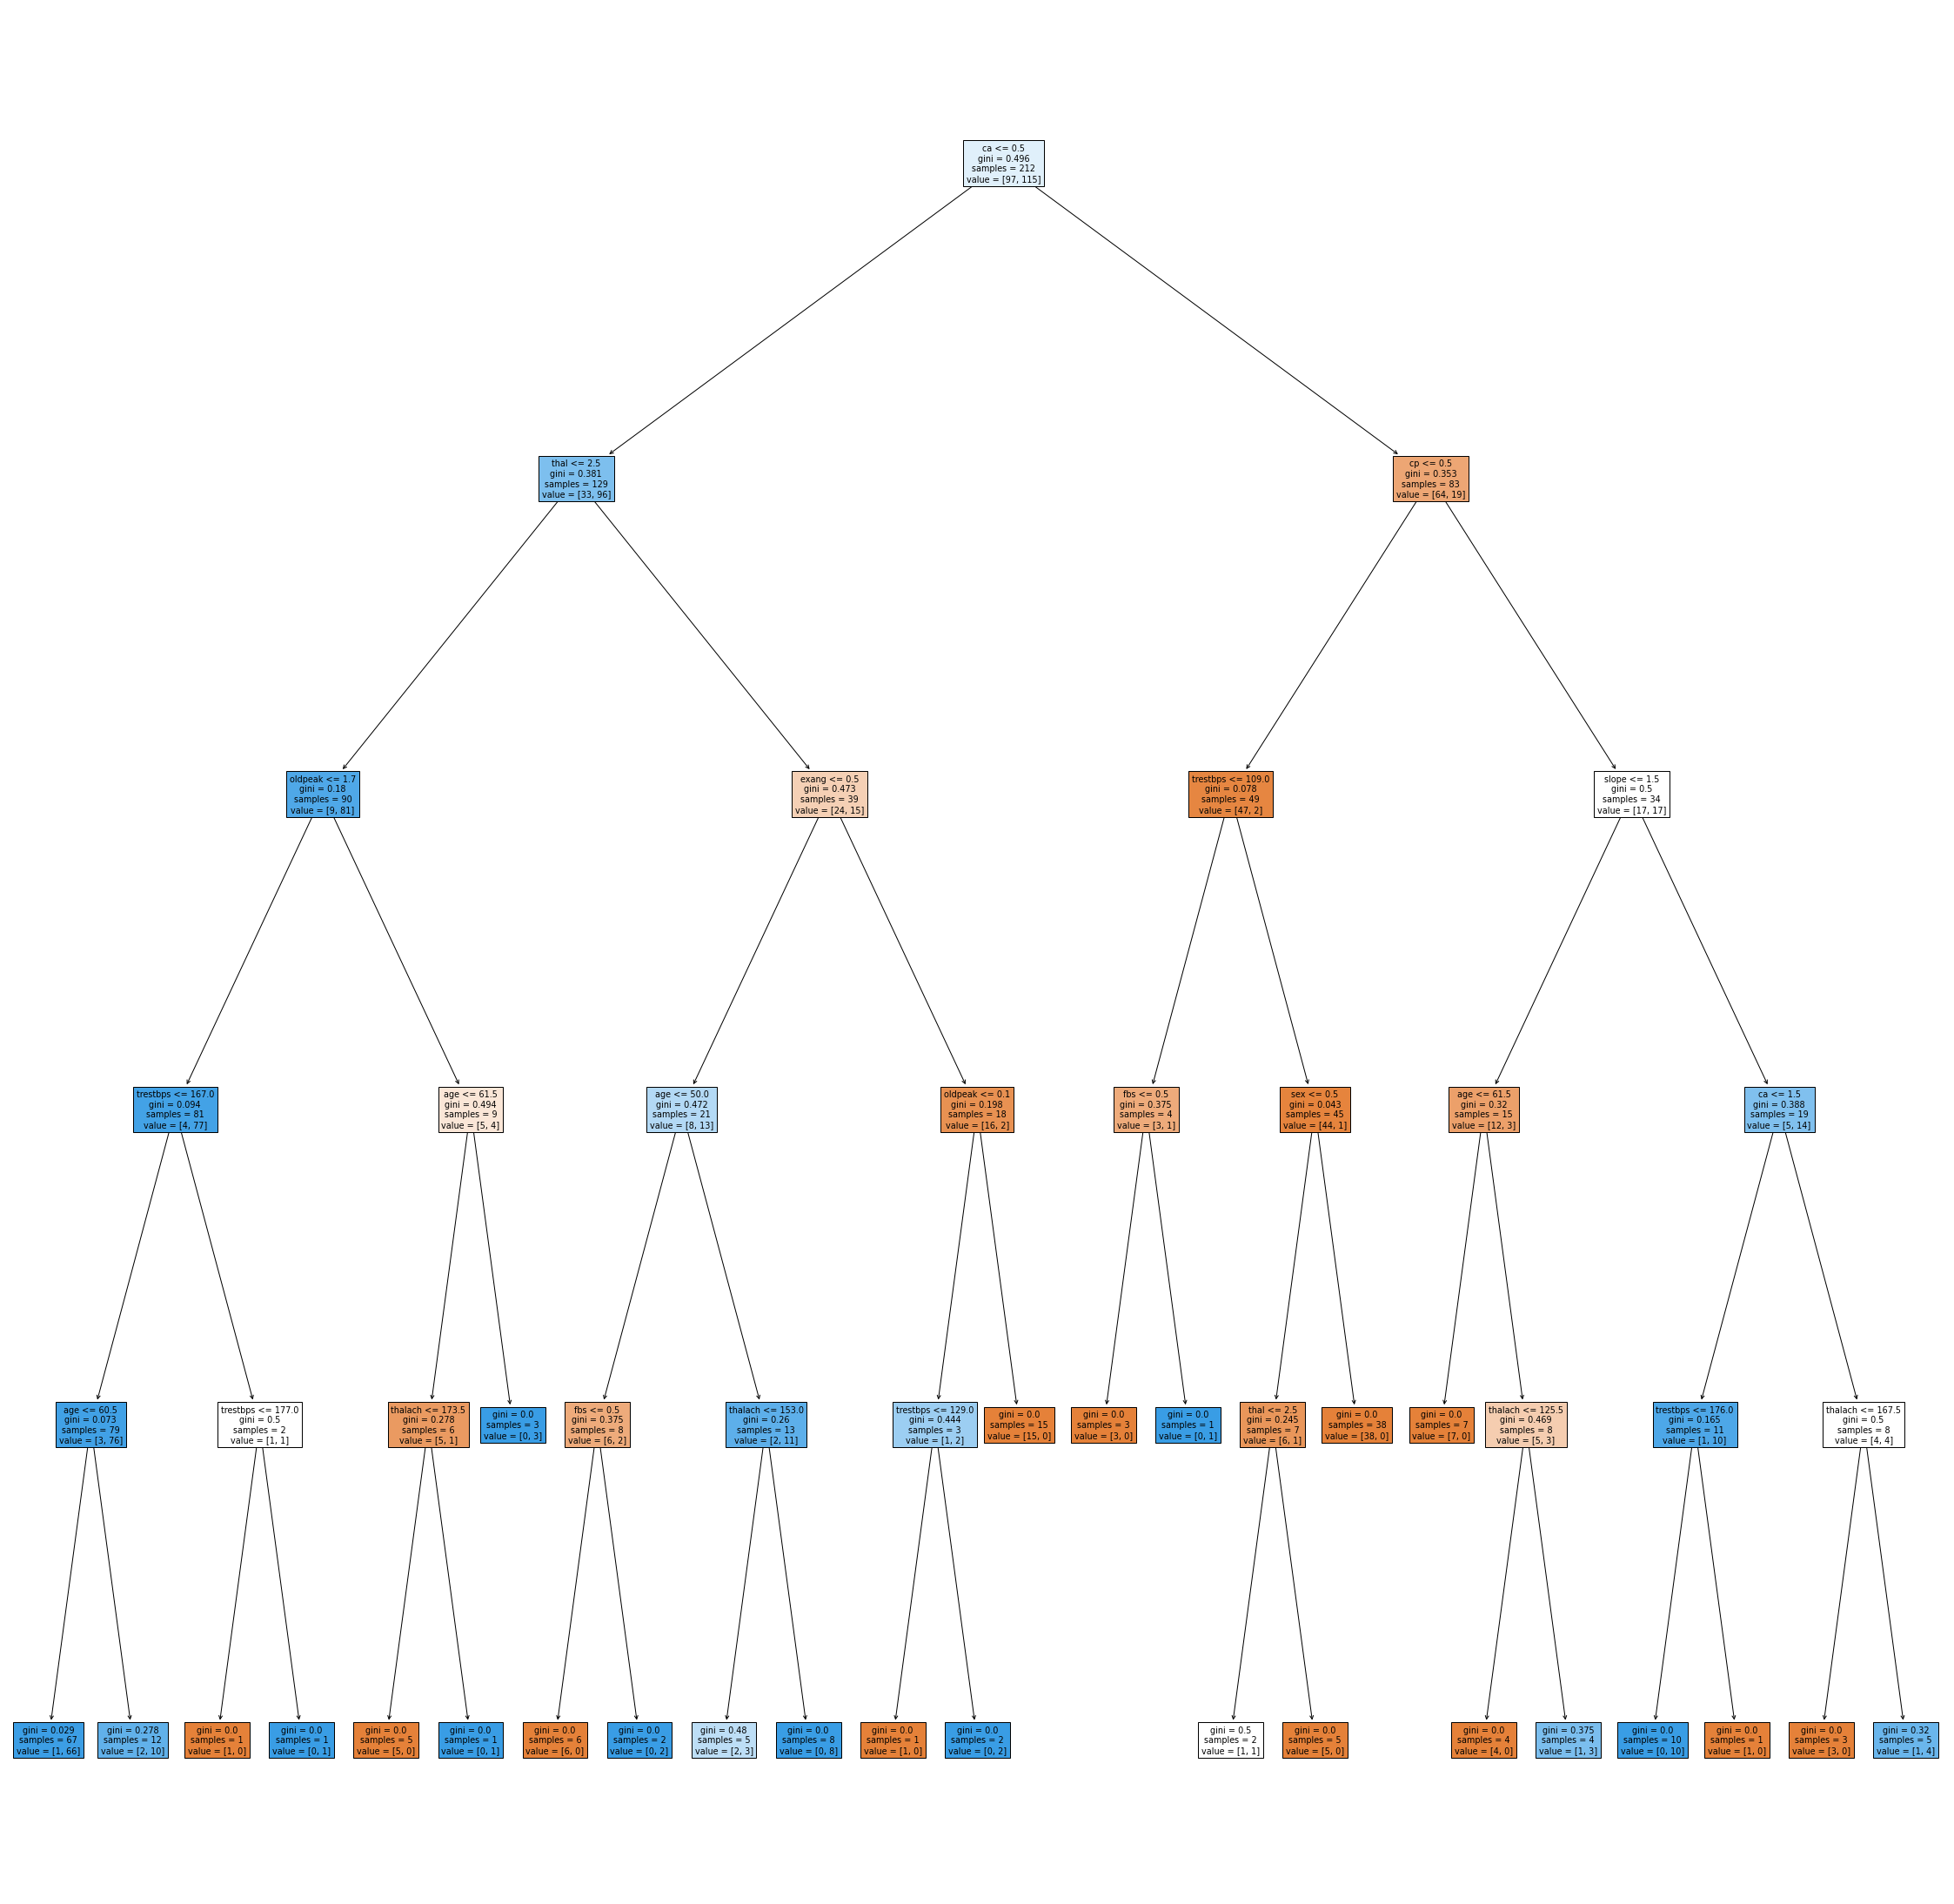

In [57]:
# plotting decision tree workflow 
fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf,
               feature_names=fn,
               filled=True)

In [58]:
# classification ML algorithms 
lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [59]:
li = [lr,sgd,knn,gb,rn,dt]
d = {}
for i in li:
    i.fit(xtrain,ytrain)
    ypred = i.predict(xtest)
    print(i,":",accuracy_score(ypred,ytest)*100)
    d.update({str(i):i.score(xtest,ytest)*100})

LogisticRegression(solver='sag') : 75.82417582417582
SGDClassifier() : 51.64835164835166
KNeighborsClassifier() : 65.93406593406593
GaussianNB() : 83.51648351648352
RandomForestClassifier() : 82.41758241758241
DecisionTreeClassifier() : 73.62637362637363


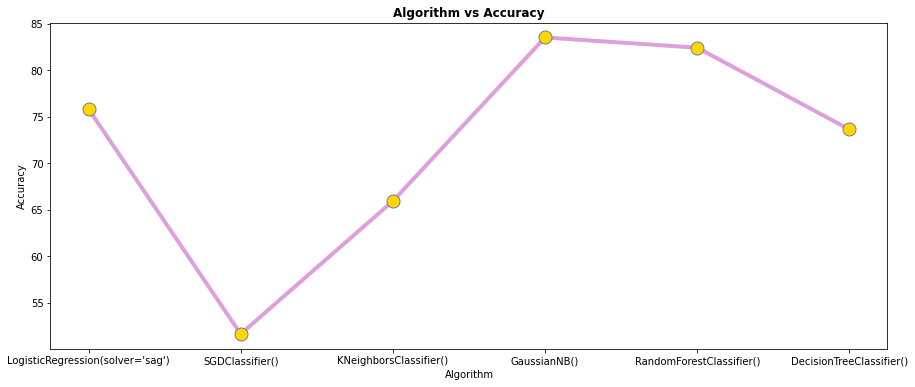

In [60]:
plt.figure(figsize=(15, 6))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='plum',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='slategray')
plt.show()

As you can see, the accuracy of basic algorithm (logistic) KNN, and SGD is not good as expected. Since the data are skewed/denormalized, so it can be fixed by scaling the data.<br>
Each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [61]:
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
# transform training data
X_train_norm = norm.transform(xtrain)
# transform testing data
X_test_norm = norm.transform(xtest)

In [62]:
li = [lr,sgd,rn,knn,gb,dt]
di = {}
for i in li:
    i.fit(X_train_norm,ytrain)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,ytest)*100)
    di.update({str(i):i.score(X_test_norm,ytest)*100})

LogisticRegression(solver='sag') : 80.21978021978022
SGDClassifier() : 80.21978021978022
RandomForestClassifier() : 79.12087912087912
KNeighborsClassifier() : 80.21978021978022
GaussianNB() : 83.51648351648352
DecisionTreeClassifier() : 70.32967032967034


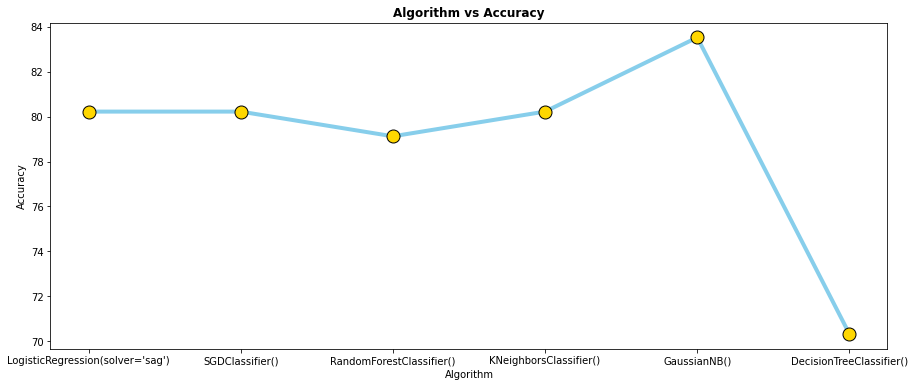

In [63]:
plt.figure(figsize=(15, 6))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(di.keys(),di.values(),marker='o',color='skyblue',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
plt.show()

As you can see the accuracy are getting high for Logistic Regression and KNN, both the algorithms are performing well . Hence this prove the importance of normalizing the data.<br>
StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [64]:
# fit scaler on training data
std = StandardScaler().fit(xtrain)
# transform train data
x_train_std = std.transform(xtrain)
# transform test data
x_test_std = std.transform(xtest)

In [65]:
li = [lr,sgd,rn,knn,gb,dt]
dic = {}
for i in li:
    i.fit(x_train_std,ytrain)
    ypred = i.predict(x_test_std)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dic.update({str(i):i.score(x_test_std,ytest)*100})

LogisticRegression(solver='sag') : 81.31868131868131
SGDClassifier() : 71.42857142857143
RandomForestClassifier() : 80.21978021978022
KNeighborsClassifier() : 86.81318681318682
GaussianNB() : 83.51648351648352
DecisionTreeClassifier() : 73.62637362637363


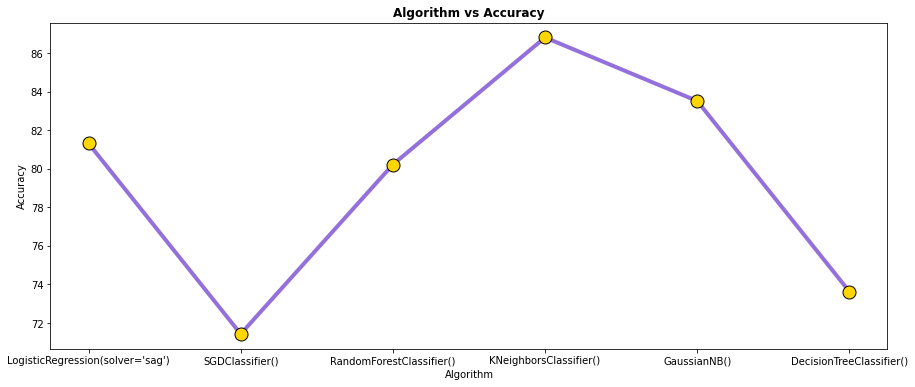

In [66]:
plt.figure(figsize=(15, 6))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dic.keys(),dic.values(),marker='o',color='mediumpurple',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
plt.show()

Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

After several stages of scaling process, got a good accuracy score pf 86.81% for KNeighborsClassifier. Even the least (DecisionTreeClassifier) is considered as a very good accuracy.

In [67]:
knn.fit(x_train_std, ytrain)
ypred = knn.predict(x_test_std)
accuracy_score(ypred,ytest)*100

86.81318681318682

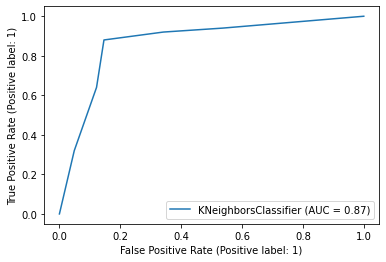

In [68]:
#plotting roc curve
plot_roc_curve(knn, x_test_std, ytest);

In [69]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



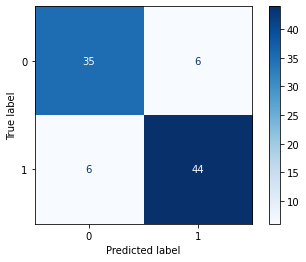

In [70]:
#confusion matrix
plot_confusion_matrix(knn, x_test_std, ytest,
                     cmap=plt.cm.Blues);